<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/boston_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-3-77a69bcf12cf>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/My Drive/ColabNotebooks/

/content/gdrive/My Drive/ColabNotebooks


In [ ]:
crime_df = pd.read_csv('boston_crime.csv', encoding="latin1")
crime_df.info()

<ipython-input-6-7c5ed56a0062>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv('boston_crime.csv', encoding="latin1")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

# Crimes VS. ____

In [ ]:
nan_test = crime_df
test_lat = []
test_long = []
nan_test = nan_test.dropna(subset=['Lat', 'Long'])
nan_test = nan_test.reset_index(drop=True)
for x in range(len(nan_test)):
  if nan_test['Lat'][x] <= 42:
    test_lat.append(x) 

nan_test = nan_test.drop(test_lat)
nan_test = nan_test.reset_index(drop=True)

for x in range(len(nan_test)):
  if nan_test['Long'][x] >= -71:
    test_long.append(x)

nan_test = nan_test.drop(test_long)
nan_test = nan_test.reset_index(drop=True)

def find_dists(dist_col):
  dists = {}
  for code in dist_col:
    dists.update({code:0})
  keys = list(dists.keys())
  for code in dist_col:
    for i in range(len(keys)):
      if keys[i] == code:
        dists.update({code:dists.get(code)+1})
  return dists

find_dists(crime_df['DISTRICT'])

{'E18': 17825,
 'D14': 20632,
 'B2': 51288,
 'A1': 36735,
 'A7': 13634,
 'C11': 43817,
 nan: 0,
 'D4': 43338,
 'E13': 17981,
 'B3': 36400,
 'C6': 24190,
 'A15': 6663,
 'E5': 13543}

## Months Plot

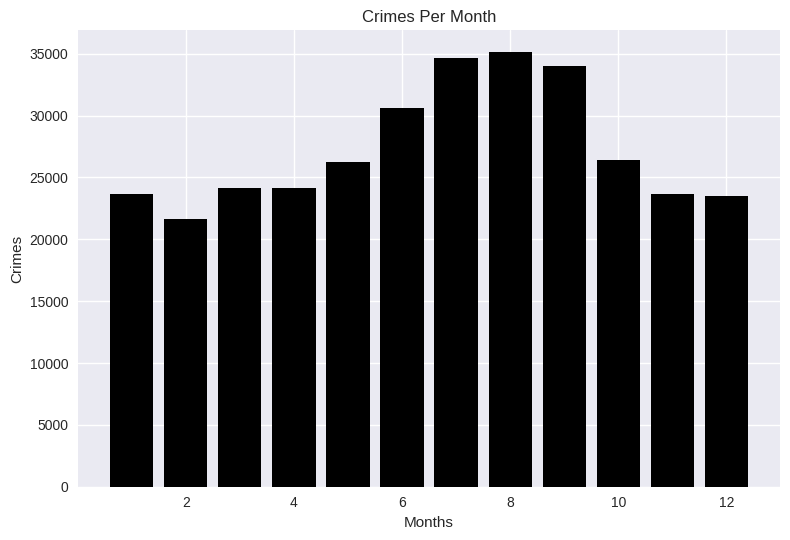

In [ ]:
months_dict = find_dists(crime_df['MONTH'])
months_keys = list(months_dict.keys())
months_vals = list(months_dict.values())

plt.bar(months_keys, months_vals, label='Crimes', color='black')

plt.xlabel('Months')
plt.ylabel('Crimes')
plt.title('Crimes Per Month')

plt.tight_layout()

plt.show()

# Assignment 1

## Crimes per month and day by year.

In [ ]:
def crimes_per_mon_day(frame, mon_col, year_col, year, day_col):
  mon_crimes = {}

  frame = frame.loc[frame[year_col]==year]

  for code in frame[mon_col]:
    mon_crimes.update({code:0})
  keys = list(mon_crimes.keys())
  for code in frame[mon_col]:
    for i in range(len(keys)):
      if keys[i] == code:
        mon_crimes.update({code:mon_crimes.get(code)+1})

  mon_keys = list(mon_crimes.keys())
  for x in range(len(mon_keys)):

    day_crimes = {}

    frame_dy = frame.loc[frame[mon_col]==mon_keys[x]]

    for code in frame_dy[day_col]:
      day_crimes.update({code:0})
    day_keys = list(day_crimes.keys())
    for code in frame_dy[day_col]:
      for i in range(len(day_keys)):
        if day_keys[i] == code:
          day_crimes.update({code:day_crimes.get(code)+1})

    print(day_crimes)

  return mon_crimes

crimes_per_mon_day(crime_df, 'MONTH', 'YEAR', 2016, 'DAY_OF_WEEK')

{'Thursday': 1476, 'Tuesday': 1102, 'Monday': 1125, 'Wednesday': 1122, 'Friday': 1544, 'Saturday': 1096, 'Sunday': 1061}
{'Monday': 1281, 'Tuesday': 1052, 'Thursday': 1021, 'Friday': 1050, 'Saturday': 1035, 'Wednesday': 1000, 'Sunday': 871}
{'Monday': 1558, 'Saturday': 1073, 'Friday': 1096, 'Tuesday': 1496, 'Wednesday': 1507, 'Sunday': 1082, 'Thursday': 1128}
{'Saturday': 1483, 'Wednesday': 1120, 'Monday': 1416, 'Tuesday': 1093, 'Thursday': 1089, 'Friday': 1168, 'Sunday': 1217}
{'Sunday': 1010, 'Friday': 1525, 'Tuesday': 1027, 'Monday': 938, 'Thursday': 1091, 'Saturday': 1244, 'Wednesday': 1002}
{'Friday': 1395, 'Wednesday': 1152, 'Saturday': 1385, 'Monday': 1142, 'Thursday': 1126, 'Sunday': 1264, 'Tuesday': 1156}
{'Sunday': 1287, 'Saturday': 1077, 'Wednesday': 1107, 'Thursday': 1178, 'Tuesday': 1425, 'Monday': 1390, 'Friday': 1118}
{'Sunday': 982, 'Friday': 1463, 'Tuesday': 1047, 'Thursday': 1056, 'Monday': 1094, 'Wednesday': 1139, 'Saturday': 1320}
{'Tuesday': 1033, 'Wednesday': 1051

{9: 8526,
 2: 7310,
 8: 8940,
 10: 8586,
 1: 7837,
 7: 8620,
 5: 8582,
 4: 8101,
 12: 7951,
 6: 8558,
 11: 7924,
 3: 8199}

## Crimes per hour by day, month, and year.

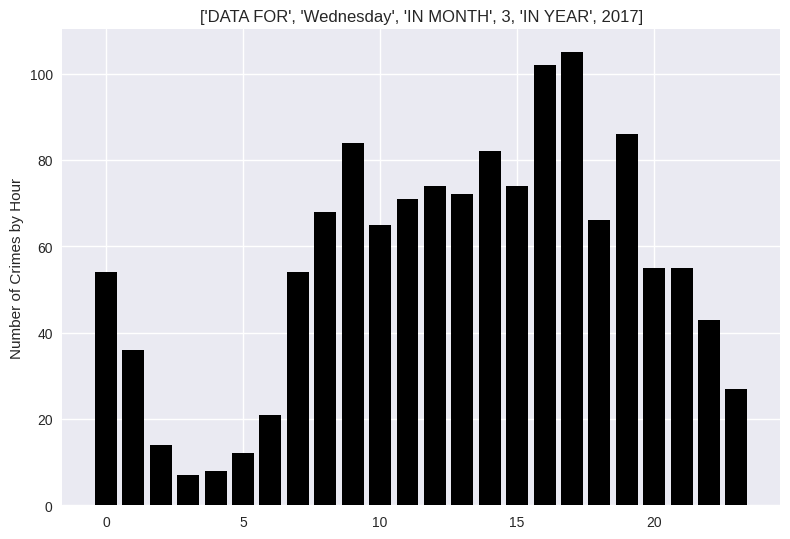

{9: 84,
 0: 54,
 13: 72,
 18: 66,
 16: 102,
 12: 74,
 10: 65,
 21: 55,
 14: 82,
 17: 105,
 11: 71,
 19: 86,
 20: 55,
 8: 68,
 15: 74,
 7: 54,
 22: 43,
 23: 27,
 2: 14,
 1: 36,
 6: 21,
 5: 12,
 4: 8,
 3: 7}

In [ ]:
def crimes_hour(frame, year_col, mon_col, day_col, hr_col):
  # year = int(input('Input the year:'))
  # month = int(input('Input the month(1-12):'))
  # day = str(input('Input the day:'))
  year = 2017
  month = 3
  day = 'Wednesday'

  frame = frame.loc[frame[year_col]==year]
  frame = frame.loc[frame[mon_col]==month]
  frame = frame.loc[frame[day_col]==day]

  hour_crimes = {}
  for code in frame[hr_col]:
    hour_crimes.update({code:0})
  keys = list(hour_crimes.keys())
  for code in frame[hr_col]:
    for i in range(len(keys)):
      if keys[i] == code:
        hour_crimes.update({code:hour_crimes.get(code)+1})


  plt.figure()
  hrs_keys = list(hour_crimes.keys())
  hrs_vals = list(hour_crimes.values())

  plt.bar(hrs_keys, hrs_vals, label='Crimes', color='black')
  plt.ylabel('Number of Crimes by Hour')
  plt.title(['DATA FOR', day, 'IN MONTH', month, 'IN YEAR', year])

  plt.tight_layout()

  plt.show()
  return hour_crimes


crimes_hour(crime_df, 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR')

# Plotting on a Map

In [ ]:
!pip install folium
import folium

boston_districts = {'Downtown': 'A1', 'Charlestown':'A15', 
'East Boston':'A7', 'Roxbury':'B2',
'Mattapan':'B3', 'South Boston':'C6',
'Dorchester':'C11', 'South End':'D4',
'Brighton':'D14', 'West Roxbury':'E5',
'Jamaica Plain':'E13', 'Hyde Park':'E18'}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def isolate_district(frame, col, dists, district):
  dist_inds = []
  dist_val = dists.setdefault(district)
  for value in range(len(frame)):
    if frame[col][value] != dist_val:
      dist_inds.append(value)
    
  dropped_df = frame.drop(dist_inds, axis=0)
  dropped_df = dropped_df.reset_index(drop=True)
  return dropped_df

Roxbury = isolate_district(nan_test, 'DISTRICT', boston_districts, 'Charlestown')
Roxbury

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182079960,3115,Investigate Person,INVESTIGATE PERSON,A15,41,NaN,2018-10-03 15:54:00,2018,10,Wednesday,15,Part Three,BUNKER HILL ST,42.376800,-71.057009,"(42.37679994, -71.05700887)"
1,I182079948,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,A15,45,NaN,2018-10-03 15:37:00,2018,10,Wednesday,15,Part Two,MEDFORD ST,42.380998,-71.062101,"(42.38099773, -71.06210065)"
2,I182079924,1402,Vandalism,VANDALISM,A15,58,NaN,2018-10-02 19:00:00,2018,10,Tuesday,19,Part Two,PHIPPS ST,42.376889,-71.066846,"(42.37688903, -71.06684611)"
3,I182079758,3115,Investigate Person,INVESTIGATE PERSON,A15,45,NaN,2018-10-02 21:49:00,2018,10,Tuesday,21,Part Three,BUNKER HILL ST,42.380084,-71.064922,"(42.38008411, -71.06492228)"
4,I182079620,1402,Vandalism,VANDALISM,A15,53,NaN,2018-10-01 22:00:00,2018,10,Monday,22,Part Two,OAK ST,42.380342,-71.069017,"(42.38034241, -71.06901686)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,I152049883,2629,Harassment,HARASSMENT,A15,58,NaN,2015-06-15 21:31:00,2015,6,Monday,21,Part Two,DUNSTABLE ST,42.376852,-71.068873,"(42.37685200, -71.06887255)"
6288,I152049707,3201,Property Lost,PROPERTY - LOST,A15,60,NaN,2015-06-15 17:59:00,2015,6,Monday,17,Part Three,PLEASANT ST,42.374223,-71.062979,"(42.37422328, -71.06297907)"
6289,I152049665,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,A15,60,NaN,2015-06-15 17:19:00,2015,6,Monday,17,Part Two,MAIN ST,42.372579,-71.061938,"(42.37257864, -71.06193810)"
6290,I152049629,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,A15,58,NaN,2015-06-15 14:55:00,2015,6,Monday,14,Part Three,MAIN ST,42.376700,-71.066022,"(42.37669967, -71.06602151)"


In [ ]:
bos_map = folium.Map([42.32, -71.0589], zoom_start=12)

def map_points(map, frame, col1, col2, crime, crime_col):
  crime_inds = []
  for value in range(len(frame)):
    if frame[crime_col][value] != crime:
      crime_inds.append(value)
  
  dropped_df = frame.drop(crime_inds, axis=0)
  dropped_df = dropped_df.reset_index(drop=True)

  for index in range(len(dropped_df)):
    folium.Marker([dropped_df[col1][index], dropped_df[col2][index]], popup=dropped_df['OCCURRED_ON_DATE'][index]).add_to(map)
    # print(dropped_df[col1][index], dropped_df[col2][index]) 
  return map

points = map_points(bos_map, Roxbury, 'Lat', 'Long', 'Warrant Arrests', 'OFFENSE_CODE_GROUP')
points